# Solutions 09

**Due:** 2022-05-13 (Friday), 11:59 PM, as a Jupyter notebook (with related files) submitted via your repo in the course GitHub organization.  Use the solutions template notebook, and **be sure not to modify the subproblem cells** in your solution file.  This assignment is **mandatory**.

**Make sure you commit, not just your Solutions notebook, but also any Python module, scripts, supplementary notebook, or images needed to run the notebook and to produce the content included or described in it.**

**Do not commit your cached Stan model files.** Those are platform-dependent. Your `.gitignore` should automatically exclude them.

### Collaboration disclosure

(You may leave this cell unmodified if you worked entirely alone on this assignment.)

## Accompanying scripts or notebooks:

myscript.py **<-- EDIT if you have uploaded accompanying scripts**

In [1]:
# The usual imports:
import numpy as np
import scipy
import matplotlib as mpl
from matplotlib.pyplot import *
from numpy import *
from scipy import stats

from stanfitter import StanFitter

## 1. Hierarchical Bayes and cancer cluster small area estimation

**Note:  This exercise does not comprise a serious analysis of cancer cluster data!**  This exercise is meant to give you some experience with hierarchical Bayesian modeling with Stan, and to help you gain some insight into issues that arise in small area estimation.

A Python module, implemented in "cancer_data.py", accompanies this assignment; it includes data you'll use for your solutions.  Also, you'll use the version of "stanfitter.py" that accompanies this assignment (it's modified vs. the version used for A08).  **Make sure you commit, not just your notebooks, but also all of the Python modules and scripts needed to run the notebooks and to produce the content included in them.**

In [2]:
# Cook county data:
nl_c = 286  # number of children with leukemia in Cook county
nc_c = 1152695  # number of children in Cook county

# Village of Niles data:
nl_n = 8  # number of children with leukemia in Niles
nc_n = 7076  # number of children in Niles

### Problem 1.1 (2 points):

**Quick-and-dirty estimation:** From the data above and what you know about inference with the Poisson distribution with *large* counts (e.g., the "root-$n$" rule), consider Niles and Cook County to have *separate* cancer rates, $\mu_n$ and $\mu_c$, and compute point estimates with uncertainties specified as approximate posterior standard deviations.  You needn't present a detailed derivation; just compute the numbers in the notebook, and print them.  Include computation of the exposures for the Niles and Cook County data.  Also print the *ratio* of the estimated Niles rate to the estimated Cook county rate (you needn't formally propagate uncertainty for the ratio).  Use these results to *briefly* explain why Niles residents were initially worried.

In [3]:
y=5
# Cook county data:
v_c=nl_c = 286  # number of children with leukemia in Cook county
nc_c = 1152695  # number of children in Cook county
mu_c=v_c*10**6/(y*nc_c)

# Village of Niles data:
v_n=nl_n = 8  # number of children with leukemia in Niles
nc_n = 7076  # number of children in Niles
mu_n=v_n*10**6/(y*nc_n)

print('Cancer rate for Cook County:',mu_c)
print('Cancer rate for Niles:',mu_n)

print('STD for Cancer rate in Cook County:',sqrt(v_c)*10**6/(y*nc_c))
print('STD for Cancer rate in Niles:',sqrt(v_n)*10**6/(y*nc_n))

sigma_c=v_c/mu_c
sigma_n=v_n/mu_n
print('Exposure for Cook County:',sigma_c)
print('Exposure rate for Niles:',sigma_n)

print('Ratio of the estimated Niles rate to the estimated Cook county rate:',mu_n/mu_c)

Cancer rate for Cook County: 49.62284038709286
Cancer rate for Niles: 226.11644997173545
STD for Cancer rate in Cook County: 2.934260064507569
STD for Cancer rate in Niles: 79.94423755642144
Exposure for Cook County: 5.763475
Exposure rate for Niles: 0.03538
Ratio of the estimated Niles rate to the estimated Cook county rate: 4.556701071681286


The cancer rate for Niles is extremely higher than the total rate in Cook County. But as a part of the Cook County, the two rates should be similar so there must be something strange happened in Niles.

### Problem 1.2 (5 points):

**Formal inference with the Poisson distribution:**  Now model the data more accurately, using a model where the Cook County data are described by a base cancer rate $\mu$, and the Niles data are modeled with a rate $f\mu$, with $f \ge 0$.

 * Write a Stan model for this setup (complete the stub below).  Take the prior for the Cook County rate to be exponential with an expectation value of $1000$, i.e., reflecting that we expect cancer rates to be below 1000 cases per million people per year (but still allowing for high values).  Take the prior for $f$ to be a gamma distribution with shape parameter $\alpha=1.5$, and with a mean of 1 (i.e., a broad prior, but with the expected $f=1$).  Make sure you understand Stan's parameterizations when you set the priors.  
 * Use StanFitter to fit the model to the four numbers provided above.  Summarize your analysis (including diagnostic work) textually in the notebook (a short paragraph or two should suffice).  Include a run of the fit in your Solutions notebook.  Use that run to include two important results:
   * A plot of the marginal posterior for $f$ (for grading purposes, this is the only plot *required* to be shown in the notebook). You may produce this via the StanFitter `stan_plot()` method, `ArviZ`, or by making a plot of your own design using `pyplot` or another Python tool.
   * Using the posterior samples for $f$, compute the posterior probability that $f>1$, i.e., that the rate in Niles is greater than the overall Cook County rate.

That's enough for the assignment, but note that even for such a simple model, a thorough analysis would include work pertaining to robustness with respect to the priors.

In [4]:
leuk_code = """
data {
    int<lower=0> nl_large; // # of large-sample leukemia cases
    int<lower=0> nc_large; // # of children in large sample
    int<lower=0> nl_small; // # of small-sample leukemia cases
    int<lower=0> nc_small; // # of children in small sample
}

parameters {
    real<lower=0> mu_large;  // rate per yr per 1e6 in large sample
    real<lower=0> fac;  // factor giving rate for small sample
}

model {
    // FILL IN HERE
    mu_large ~ exponential(0.001);
    fac~gamma(1.5,1.5); // # mean=alpha/beta
    nl_large~poisson(nc_large*mu_large/1000000);
    nl_small~poisson(nc_small*mu_large*fac/1000000);
}
"""

nfitter = StanFitter(leuk_code)
ndata = dict(nl_large=nl_c, nc_large=nc_c, nl_small=nl_n, nc_small=nc_n)

Using cached StanModel from cached-model-Anon-054d70daa083d09398280b40c9fc3251.pkl...



>>> Using conservative adapt_delta = 0.95 (vs. Stan default of 0.8). <<<




Gradient evaluation took 4.3e-05 seconds
Gradient evaluation took 3.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.38 seconds.
Gradient evaluation took 4.8e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.43 seconds.
Adjust your expectations accordingly!


Adjust your expectations accordingly!

1000 transitions using 10 leapfrog steps per transition would take 0.48 seconds.
Adjust your expectations accordingly!




Gradient evaluation took 4.7e-05 seconds
1000 transitions using 10 leapfrog steps per transition would take 0.47 seconds.
Adjust your expectations accordingly!


Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:    1 / 5000 [  0%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (Warmup)
Iteration:  500 / 5000 [ 10%]  (W

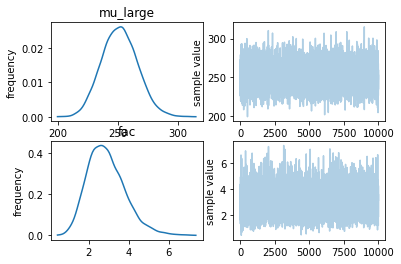

In [5]:
##1. A plot of the marginal posterior for f
nfitter.set_data(ndata)
n_iter, n_chains = 5000, 4
nfit = nfitter.sample(n_iter, n_chains)
# Stan's default plot, showing a (marginal) PDF (via KDE) and a merged-chains
# trace plot:
fig = nfit.stan_plot()

In [10]:
print(nfit.mu_large)
print(nfit.fac)

Parameter <mu_large> summary:
Convergence and mixing diagnostics:  Rhat = 1.00, ESS = 6616
Mean (se), median, sd:  251 (0.183),  251,  14.9
Central intvls:  50%: [241, 261];  95%: [224, 282]

Parameter <fac> summary:
Convergence and mixing diagnostics:  Rhat = 1.00, ESS = 6577
Mean (se), median, sd:  2.89 (0.0116),  2.79,  0.941
Central intvls:  50%: [2.21, 3.46];  95%: [1.36, 5.04]



MCMC output: The output shows that all the iterations converges and also reports E-BFMI below 0.2. ESS for all the parameters are a few thousands and that indicates the sample size is effective. The marginal distribtuion and trace plot also show they are randomly distributed nicely and there is sufficient burn-in. It also indicates the sample size is effective.

In [9]:
##2. compute the posterior probability that f>1
facs=nfit.fac.thinned
print('The posterior probability that f>1 is:',round(len(facs[facs>1])/len(facs),4))

The posterior probability that f>1 is: 0.997


## Multilevel modeling of cancer cluster data

You should find a fairly large probability that the Niles rate, *considered in isolation*, is larger than the overall Cook County rate.  However, ultimately it was determined that the Niles data were adequately explained as a chance result, due largely to the *multiplicity* considerations mentioned above.

There are several approaches for accounting for multiplicity in small area estimation.  From the Bayesian point of view, multilevel or hierarchical modeling provides a flexible framework for describing multiplicity effects. We won't explore this further for the Niles data here, but we'll consider a related problem whose analysis will take us a step up in complexity.

For Problem 2, you'll develop a simple multilevel model for data resembling the Niles data, but considering several small sub-populations that together comprise a larger sub-population, situated in an even larger general population.  To make the problem interesting, we'll look at data rather close to home:  the general population will be _**New York state**_, the intermediate population will be _**Tompkins County**_, and among the subpopulations will be _**Ithaca and surrounding areas**_.

In [11]:
from cancer_data import bc_counts, bc_expect, pc_counts, pc_expect, ith_indx

### Problem 2.1 (3 points):

> * Draw the DAG corresponding to this model.  Use any tool you wish to draw it; only include the final figure in your notebook (with a description of what tool you used if it's not obvious).  Most diagramming or drawing applications will be good enough for this simple DAG.  You might consider learning about one of the following (see the lab notebook on drawing DAGs for coverage of some of these):
>   * [graphviz](http://www.graphviz.org/):  This is an "industry standard" for graph drawing.  It is based on a simple language called *dot* for describing graphs via lists of node names and edge descriptions.  *graphviz* itself is a collection of command-line tools that process *dot* files and produce graphical output.  Several other graph drawing tools use the *dot* language.  Mac users can easily install *graphviz* via Homebrew; it is widely available in Linux package managers.  There are multiple Python packages providing Python interfaces to *graphviz* ([PyPI search](https://pypi.python.org/pypi?%3Aaction=search&term=graphviz&submit=search)).
>   * [DAFT](https://docs.daft-pgm.org/en/latest/):  This is a Python package that uses matplotlib to draw nice-looking graphs.
>   * I use [OmniGraffle](https://www.omnigroup.com/omnigraffle) for the graphs shown in lectures; it's a commercial diagramming app (Mac and iOS only) that's not cheap, but worth it (there is an academic discount). [Microsoft Visio](https://www.microsoft.com/en/microsoft-365/visio/flowchart-software) is a Windows tool offering similar capability. Unlike OmniGraffle, it does not have built in support for the *graphviz* *dot* language, but the [GraphVizio](https://www.calvert.ch/graphvizio/) Visio add-in provides some *dot* support.
>   * Presentation software like Apple's Keynote or Microsoft's PowerPoint can be used to draw simple graphs, and could work for this problem.
>   * Feel free to draw the DAG by hand and include a scan or photo in your notebook (use a compressed image format supported by the notebook, like PNG or JPG; please, no selfies!).

> * Complete the Stan model stub below to model the data as described above.  Note that it includes a `transformed parameters` block relating the $\mu_f$ and $\sigma_f$ parameters to the $(\alpha,\beta)$ that Stan needs for the population gamma distribution.  Read the Stan manual if you'd like to learn more about this capability (see [Stan Language Reference Manual - Section 8, Program Blocks](https://mc-stan.org/docs/2_23/reference-manual/blocks-chapter.html)).  Compile the model with StanFitter in the notebook.

<img width=500 src="dag0.jpeg">

In [11]:
# NY state cancer registry model:
cancer_code = """
data {
    int<lower=0> n_a; // # of areas
    int counts[n_a]; // cancer cases in each area
    real expect[n_a]; // expected # of cases in each area
}

parameters {
    real<lower=0.> fac[n_a];  // factor = actual prevalence/expected
    real<lower=0.> mu_f;  // pop'n mean for factors
    real<lower=0.> sigma_f;  // pop'n std dev'n for factors
}

transformed parameters {
    real<lower=0.> alpha;  // gamma dist'n alpha
    real<lower=0.> beta;  // gamma dist'n beta
    alpha = mu_f*mu_f / (sigma_f*sigma_f);
    beta = mu_f / (sigma_f*sigma_f);
}

model {
    mu_f~gamma(1.5,1.5);
    sigma_f~gamma(1.,1.);
    for(i in 1:n_a){
        fac[i]~gamma(alpha,beta);
        counts[i]~poisson(expect[i]*fac[i]);
    }
}
"""

cfitter = StanFitter(cancer_code)

bc_data = dict(n_a=len(bc_counts), counts=bc_counts, expect=bc_expect)
pc_data = dict(n_a=len(pc_counts), counts=pc_counts, expect=pc_expect)

Using cached StanModel from cached-model-Anon-02ac7ebb3149f3cd3bb593077d71497f.pkl...


### Problem 2.2 (4 points):

> * Write a function with signature `fit_plots(fit)` that takes a `StanFitResults` instance (from running the model's `sample()` method) and makes the plots described in the two bullets below. Include the function in your Solutions notebook, or import it from a companion Python module so you can run it in the notebook.  Arrange the plots however you see fit, but try to consolidate the results while keeping them easy to understand.  For example, my first try used a single `figure` with 5 subplots; the $f_i$ marginals were shown by plotting 3 per subplot (2 in the last), in 4 of the subplots, as translucent histograms (I found showing more than 3 per subplot made them too hard to distinguish), and the scatterplot was in the last subplot. That is just one way to do it.
>    * Marginal distributions for all 11 $f_i$ factors;
>    * A scatterplot displaying samples from the marginal posterior density for $(\mu_f,\sigma_f)$, with $\mu_f$ along the $x$ axis.

> * Fit the breast cancer data, and display the marginals with `fit_plots`, in the notebook.  Be sure to look at MCMC diagnostics (outside of the Solutions notebook), *briefly* recording observations in your notebook from your analysis (you needn't include diagnostic plots or many details).  In my preliminary runs, I found that to get useful effective sample sizes (at least 1000; a few thousand is better), I needed far more than the few 1000 iterations we've sometimes used to get satisfactory results with simpler models.  Briefly summarize what the plots indicate about the local breast cancer rates (of course, this is a simplified analysis, so do not take the results too seriously).

> * Similarly, fit the prostate cancer data, summarize your analysis, display the results with `fit_plots`, and briefly describe what they indicate about local rates.

**Note:** You will likely see some warning messages from Stan about the internal E-BFMI (Energy Bayesian Fraction of Missing Information) being low in some chains, or that there are divergences. This is an indication that the NUTS sampler is having trouble exploring some parts of the parameter space. This can happen here if population distributions with $\sigma_f \approx 0$ are consistent with the data, because this effectively corresponds to a $\delta$ function population distribution for the $f_i$ values. You may ignore this warning in this assignment (the values of BFMI shouldn't be *too* much lower than the 0.2 value indicating some concern), but in a more careful analysis we would consider a different population description (perhaps comparing models with $\delta$ functions to broader models). For more discussion of this (with pointers to relevant literature), see the lab exercise notebook on beta-binomial modeling of baseball batting average data.

One relatively simple way you may be able to reduce the divergences or E-BFMI warnings is to force Stan to use a smaller step size then it's default adaptive step size. You can do this by adding a `control` keyword argument when you call a fitter object's `sample()` method: `sample(..., control={'adapt_delta': 0.99})`. The `adapt_delta` defaults to 0.95; making it closer to 1 decreases the NUTS sampler step size, which will make sampling take longer. Feel free to explore this if you like, but it's not required.

In [12]:
##write the fit_plot function
import matplotlib.pyplot as plt
def fit_plots(fit):
    plt.rcParams["figure.figsize"] = (10,20)
    fig, (ax1, ax2,ax3,ax4,ax5) = plt.subplots(5)
    ax1.hist(fit.fac[0].thinned,alpha=0.5,label='f0')
    ax1.hist(fit.fac[1].thinned,alpha=0.50,label='f1')
    ax1.hist(fit.fac[2].thinned,alpha=0.50,label='f2')
    ax2.hist(fit.fac[3].thinned,alpha=0.5,label='f3')
    ax2.hist(fit.fac[4].thinned,alpha=0.50,label='f4')
    ax2.hist(fit.fac[5].thinned,alpha=0.50,label='f5')
    ax3.hist(fit.fac[6].thinned,alpha=0.5,label='f6')
    ax3.hist(fit.fac[7].thinned,alpha=0.50,label='f7')
    ax3.hist(fit.fac[8].thinned,alpha=0.50,label='f8')
    ax4.hist(fit.fac[9].thinned,alpha=0.5,label='f9')
    ax4.hist(fit.fac[10].thinned,alpha=0.50,label='f10')

    ax5.set_title('Scatter Plot')
    ax1.legend()
    ax2.legend()
    ax3.legend()
    ax4.legend()
    mu_fc=fit.mu_f.chains
    sigma_fc=fit.sigma_f.chains
    ax5.scatter(mu_fc,sigma_fc)


Gradient evaluation took 0.000171 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.71 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.000233 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.33 seconds.
Adjust your expectations accordingly!



Iteration:   1 / 1000 [  0%]  (Warmup)
Gradient evaluation took 0.000118 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.18 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 0.000282 seconds
1000 transitions using 10 leapfrog steps per transition would take 2.82 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (W

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: gamma_lpdf: Shape parameter is 0, but must be > 0!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: gamma_lpdf: Shape parameter is inf, but must be finite!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of t

Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 300 / 1000 [ 30%]  (Warmup)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 400 / 1000 [ 40%]  (Warmup)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (S

Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.221353 seconds (Warm-up)
               0.462435 seconds (Sampling)
               0.683788 seconds (Total)



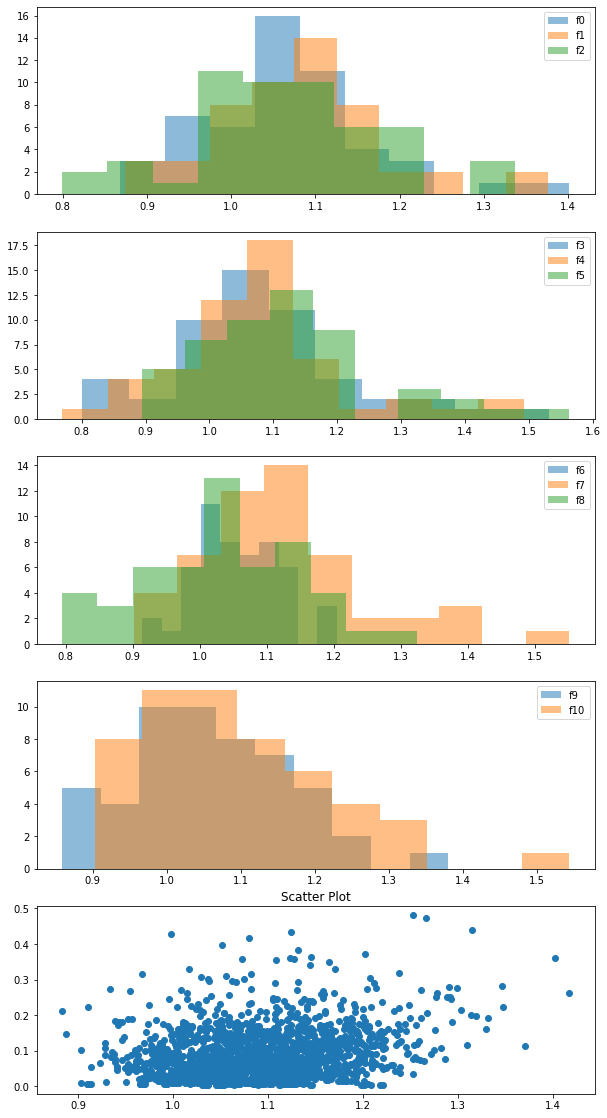

In [107]:
cfitter.set_data(bc_data)
n_iter, n_chains = 1000,4
bcfit = cfitter.sample(n_iter, n_chains,control={'adapt_delta': 0.99})
itfit_plots(bcfit)

MCMC output:

1. The output shows that 3 of 2000 iterations ended with a divergence and 0.15 % is under borderline like 1% so it will not be a big concern. It also reports E-BFMI below 0.2 
2. ESS for all the parameters are a few hundreds and that indicates the sample size is effective.
3. The marginal distribtuion and trace plot of mu and sigma also show they are randomly distributed nicely and there is sufficient burn-in. It also indicates the sample size is effective.

The marginal distributions of f in all areas show that they all seem to have a possibility higher than 0.5 to be larger than 1. That means the counts of breast cancer follow a possion distribution and the mean is more likely to be larger than the expected value in the area, indicating an increasing trend of breast cancer.

For Ithaca, the mean of the possion distribution is closer to one so the increase is relatively more slight compared to other districts.


Gradient evaluation took 0.000195 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.95 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 0.000106 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.06 seconds.
Adjust your expectations accordingly!



Gradient evaluation took 0.00016 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.6 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration:   1 / 1000 [  0%]  (Warmup)

Gradient evaluation took 0.000111 seconds
1000 transitions using 10 leapfrog steps per transition would take 1.11 seconds.
Adjust your expectations accordingly!


Iteration:   1 / 1000 [  0%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 100 / 1000 [ 10%]  (Warmup)
Iteration: 200 / 1000 [ 20%]  (War

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: gamma_lpdf: Shape parameter is 0, but must be > 0!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the following issue:
Exception: gamma_lpdf: Shape parameter is 0, but must be > 0!  (in 'unknown file name' at line 25)

If this warning occurs sporadically, such as for highly constrained variable types like covariance matrices, then the sampler is fine,
but if this warning occurs often then your model may be either severely ill-conditioned or misspecified.

Informational Message: The current Metropolis proposal is about to be rejected because of the fo

Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 500 / 1000 [ 50%]  (Warmup)
Iteration: 501 / 1000 [ 50%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.1625 seconds (Warm-up)
               0.139155 seconds (Sampling)
               0.301655 seconds (Total)

Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)
Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.200942 seconds (Warm-up)
               0.236427 seconds (Sampling)
               0.437369 seconds (Total)

Iteration: 600 / 1000 [ 60%]  (Sampling)
Iteration: 700 / 1000 [ 70%]  (Sampling)
Iteration: 800 / 1000 [ 80%]  (Sampling)
Iteration: 900 / 1000 [ 90%]  (Sampling)


Iteration: 1000 / 1000 [100%]  (Sampling)

 Elapsed Time: 0.264207 seconds (Warm-up)
               2.3389 seconds (Sampling)
               2.60311 seconds (Total)



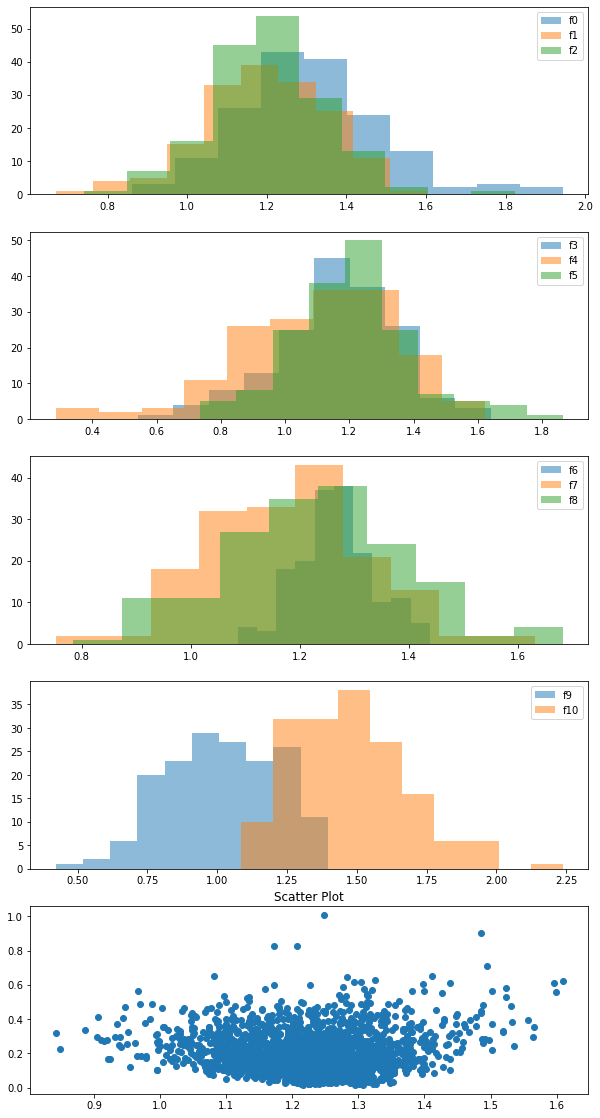

In [13]:
cfitter.set_data(pc_data)
n_iter, n_chains = 1000,4
pcfit = cfitter.sample(n_iter, n_chains,control={'adapt_delta': 0.99})
fit_plots(pcfit)

MCMC output:

1. The output shows that 4 of 2000 iterations ended with a divergence and 0.20 % is under borderline like 1% so it will not be a big concern. In this case, E-BFMI is not below 0.2.
2. ESS for mu and sigma are close to 1000 and others are a few thousands that indicates the sample size is effective.
3. The marginal distribtuion and trace plot of mu and sigma also show they are randomly distributed nicely and there is also sufficient burn-in.. It also indicates the sample size is effective.

Similar to the breast cancer data, he marginal distributions of f in all areas show that they all seem to have a possibility higher than 0.5 to be larger than 1. That means the counts of breast cancer follow a possion distribution and the mean is more likely to be larger than the expected value in the area, indicating an increasing trend.

Among all the areas, Spencer seems to have a possion mean close to 1. For Ithaca, the mean of the possion distribution is over 1.2 so the increasing trend is more obvious.